## Cenário I
### Definição do Problema:

No seguinte cenário você é a pessoa cientista de dados por trás de um projeto de analytics junto a uma grande indústria norte-americana.

Os dados a serem ingeridos e analisados em nossa plataforma de Big Data são dados de compras (orders), pessoas (people) e devoluções (returns).

Sua primeira tarefa, a partir desse cenário, deve ser um relatório (de preferência um <a href="https://jupyter.org/">jupyter notebook</a> ou <a href="https://colab.research.google.com/">colab notebook</a> relatando algumas das anomalias encontradas e investigações possíveis (falamos que aqui encorajamos gente curiosa, certo?!)

O dataset a ser utilizado nesse cenário (.zip com arquivo CSV) você encontra <a href="https://drive.google.com/file/d/1a8UCbzXFbqTQi0x8tqCXPRTlB--E7o8I/view?usp=sharing">aqui</a>.

Temos um apreço muito grande por qualidade e disponibilidade. Sendo assim, é bom contarmos com métricas para nos previnir e alertar sobre quaisquer problemas bem como metrificar e monitorar as arquitetura proposta. Logo, apreciamos se você conseguir entregar testes que mensurem a qualidade dos dados junto à sua solução desse primeiro entregável.


In [113]:
import json
import pandas as pd
import os
import gdown
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set()
from scipy.stats import normaltest
from scipy import stats
%matplotlib inline

In [53]:
url='https://drive.google.com/uc?id=12y_SARDGlRxP-Jlj8BnNSht-XVEjXOwL&export=download'

# faz o download do arquivo 'data.json'
output = 'teste_eng_dados_sample.zip'

gdown.download(url, output, quiet=False)

with zipfile.ZipFile(output,"r") as zip_ref:
      zip_ref.extractall()

os.remove(output)

Downloading...
From: https://drive.google.com/uc?id=12y_SARDGlRxP-Jlj8BnNSht-XVEjXOwL&export=download
To: /content/teste_eng_dados_sample.zip
100%|██████████| 957k/957k [00:00<00:00, 42.9MB/s]


In [54]:
file_name = 'sample.xls'

df=pd.read_excel(file_name)

# Análise Exploratória

In [55]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Verificando se temos valores nulos e se os tipos de dados para cada coluna estão corretos:

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [57]:
df.isnull().sum() # Não existem valores faltantes,

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Não temos valores nulos, vamos converter a coluna 'Postal Code' para stringe, representando uma variável categórica, pois não faz sentido fazer operações matemáticas com o código postal

In [58]:
df['Postal Code']=df['Postal Code'].astype('str')

In [59]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,623.245101,2.225110,0.206452,234.260108


As variáveis Quantity e Discount aparentemente seguem uma distribuição normal, pois a média é muito próxima da mediana, diferente das variáveis Sales e Profit.

## Média de Faturamento(Vendas) por Estado

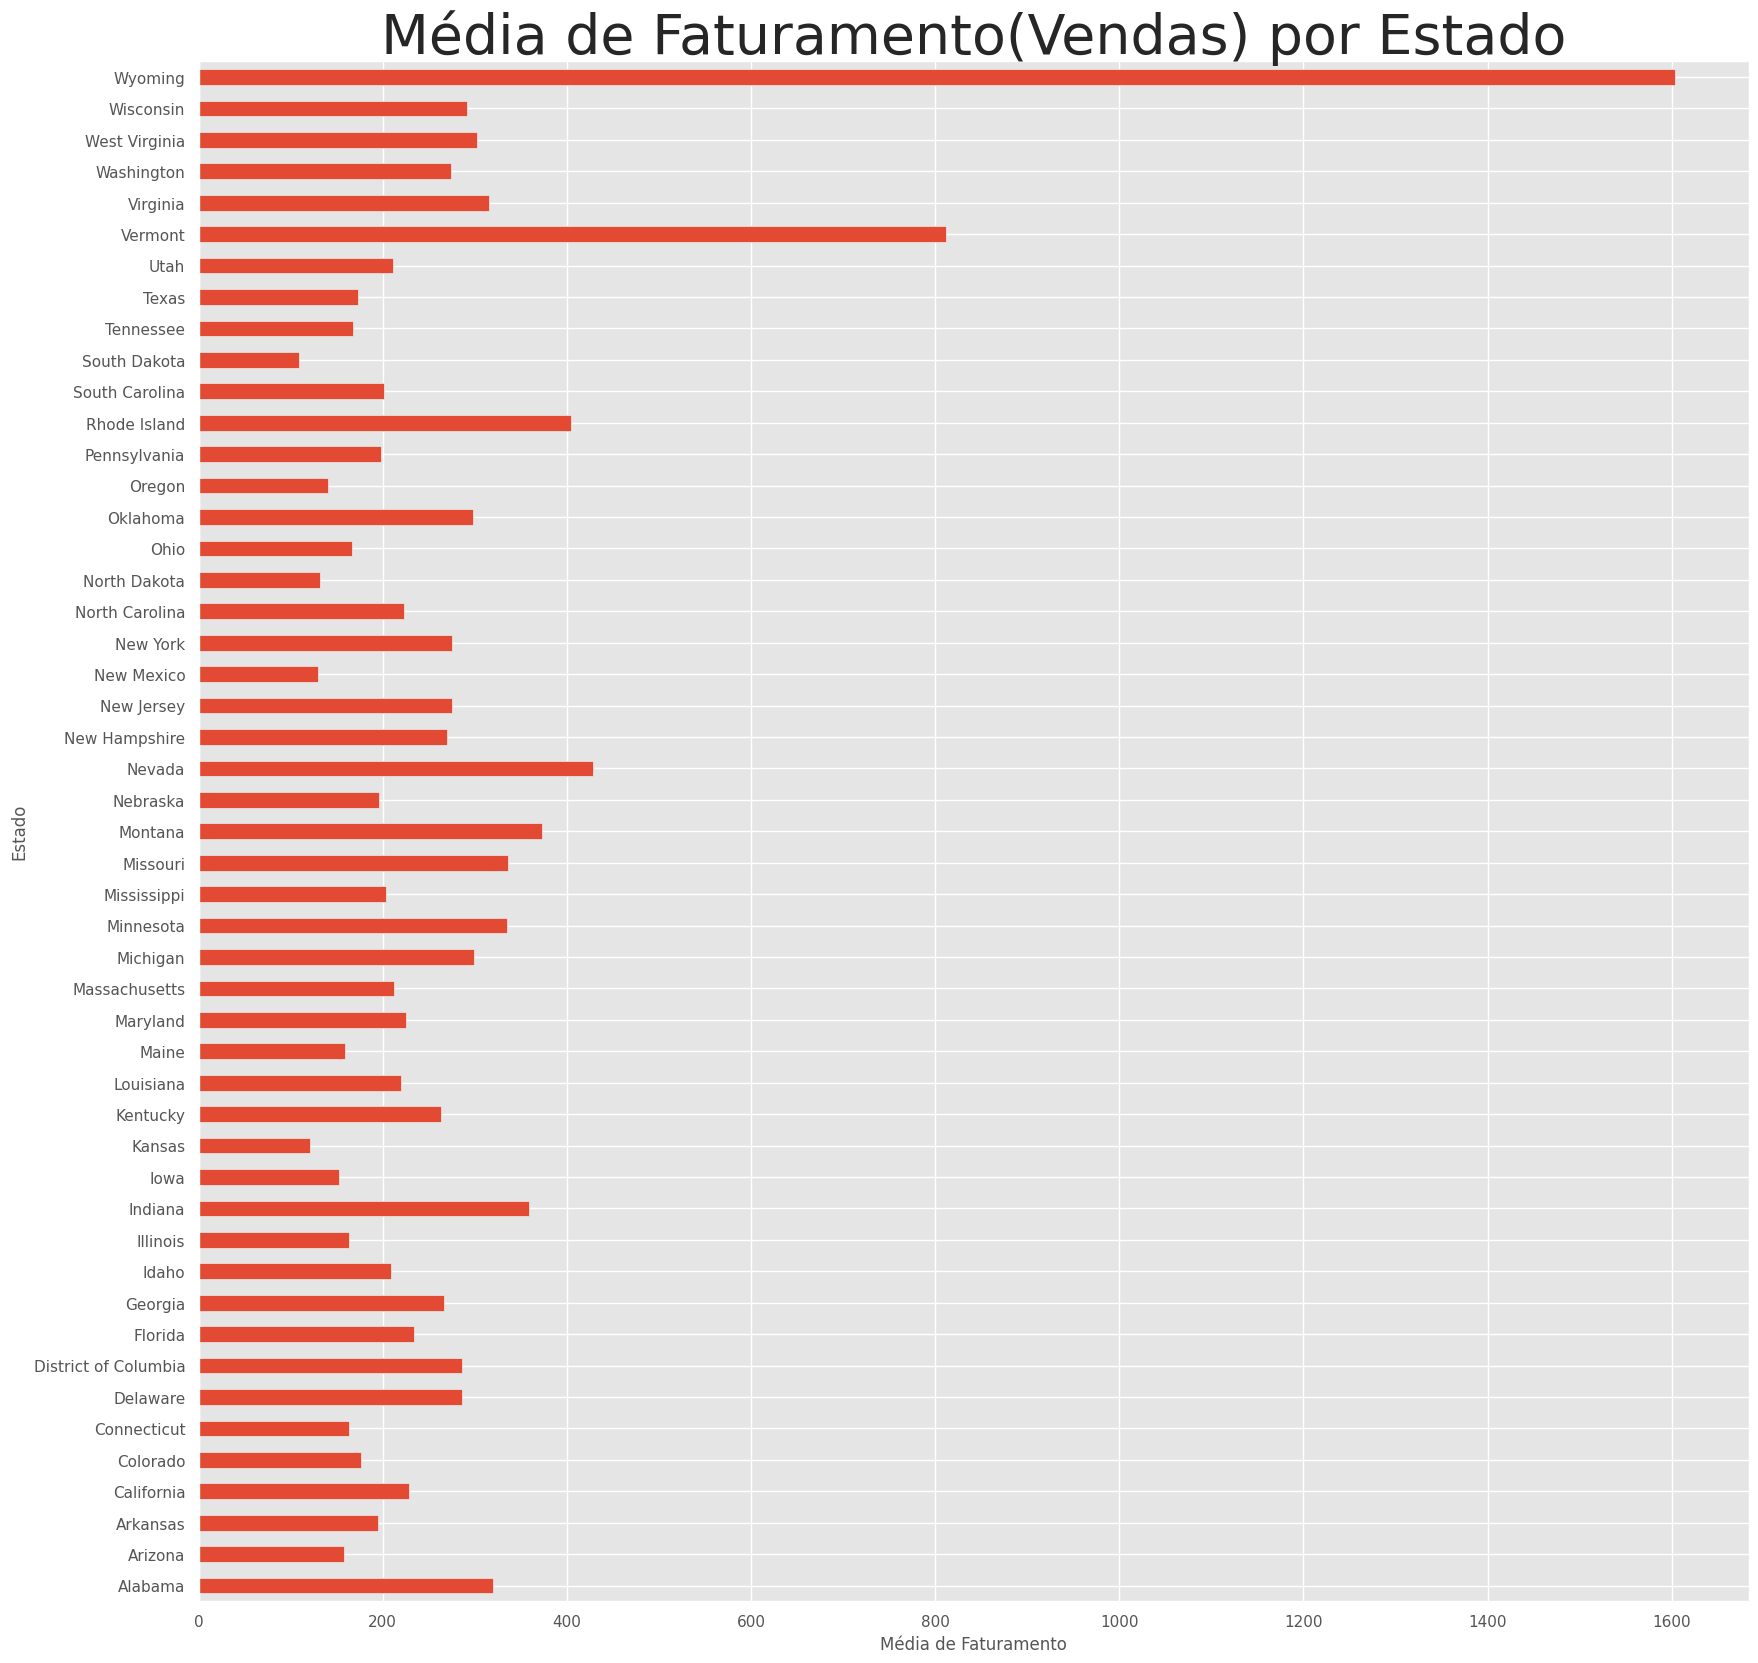

In [60]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 20))
df.groupby(['State'])['Sales'].mean().plot(kind='barh')
plt.title("Média de Faturamento(Vendas) por Estado",fontsize=40)
plt.xlabel("Média de Faturamento")
plt.ylabel("Estado")
plt.show()

Analisando o gráfico vemos que o estado com maior média de Faturamento(valor total arrecadado com vendas) foi Wyoming,com uma média de aproximadamente \$ 1600, e o pior foi South Dakota com uma média de \$ 109.63.

## Média de Faturamento Por Cidade

In [61]:
df.groupby(['City'])['Sales'].mean().sort_values(ascending=False)

City
Jamestown       2354.395000
Cheyenne        1603.136000
Bellingham      1263.413333
Independence    1208.685000
Burbank         1082.386000
                   ...     
Ormond Beach       2.808000
Pensacola          2.214000
Jupiter            2.064000
Elyria             1.824000
Abilene            1.392000
Name: Sales, Length: 531, dtype: float64

A cidade com o maior média de faturamento foi Jamestown com S 2354.395, e a pior foi Abilene com $ 1.392000

## Distribuição dos Dados de Faturamento

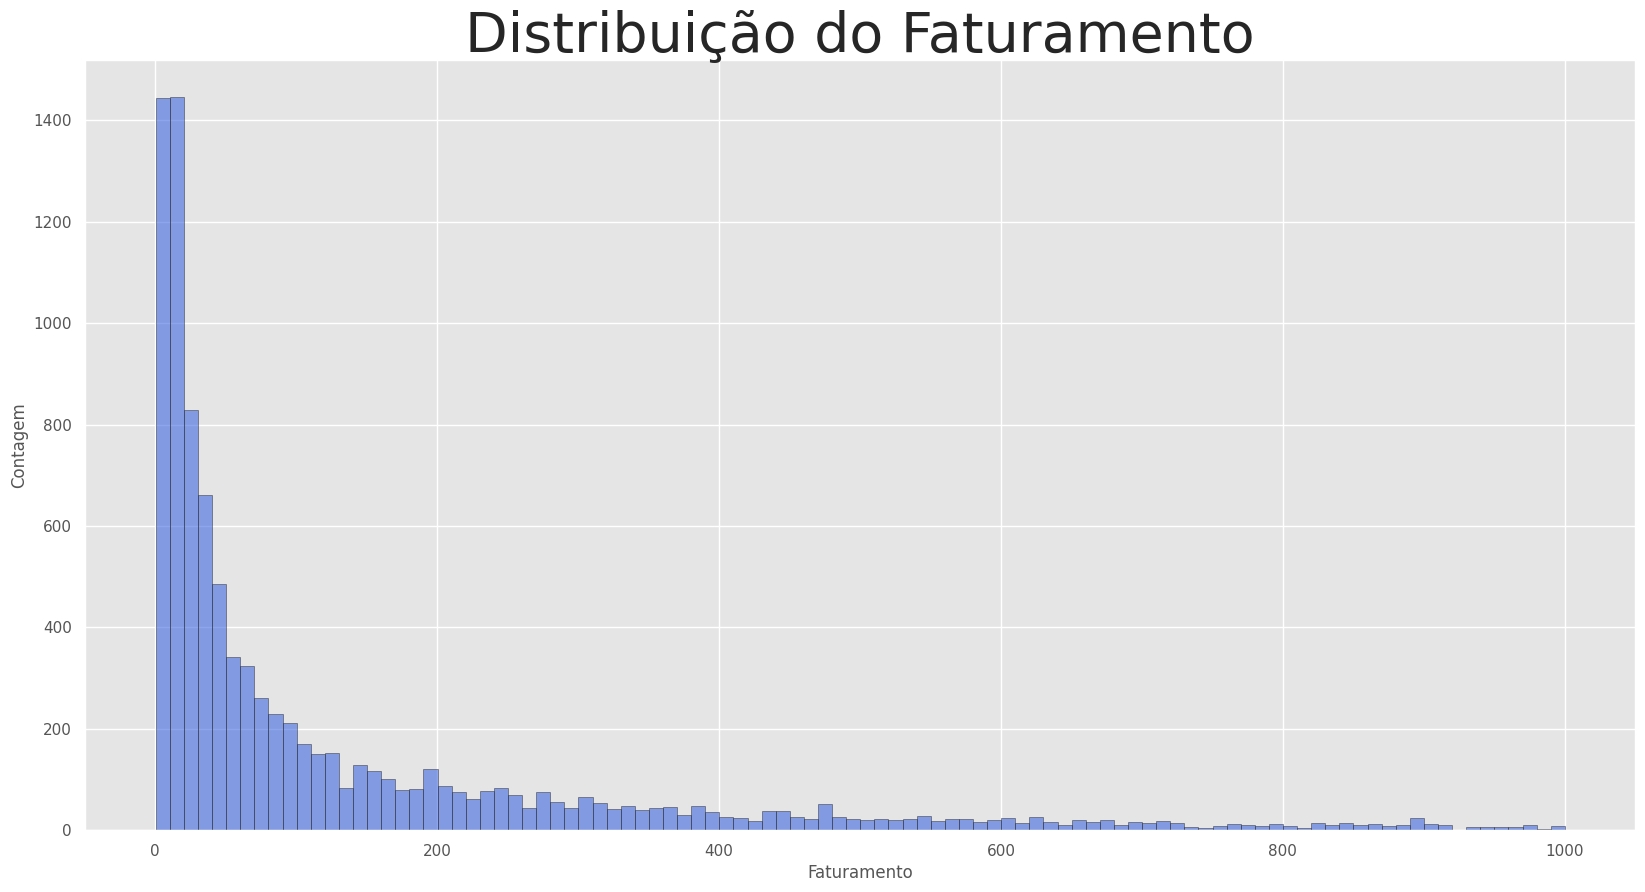

In [62]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 10))
df[df['Sales']<1000]['Sales'].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição do Faturamento",fontsize=40)
plt.xlabel("Faturamento")
plt.ylabel("Contagem")
plt.show()

## Distribuição dos Dados de Lucro

Claramente os dados não seguem uma distribuição normal, como já suspeitava-mos, sendo que a distribuição é assimétrica a direita, sendo que a maior parte do faturamento está no intervalo até \$ 50.

Obs: Limitamos o faturamento até \$ 1000 para possibilitar a visualização

<ipython-input-63-a026874a0128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['Profit']>-100) & (df['Profit']<100)]['Profit'], ax=ax)


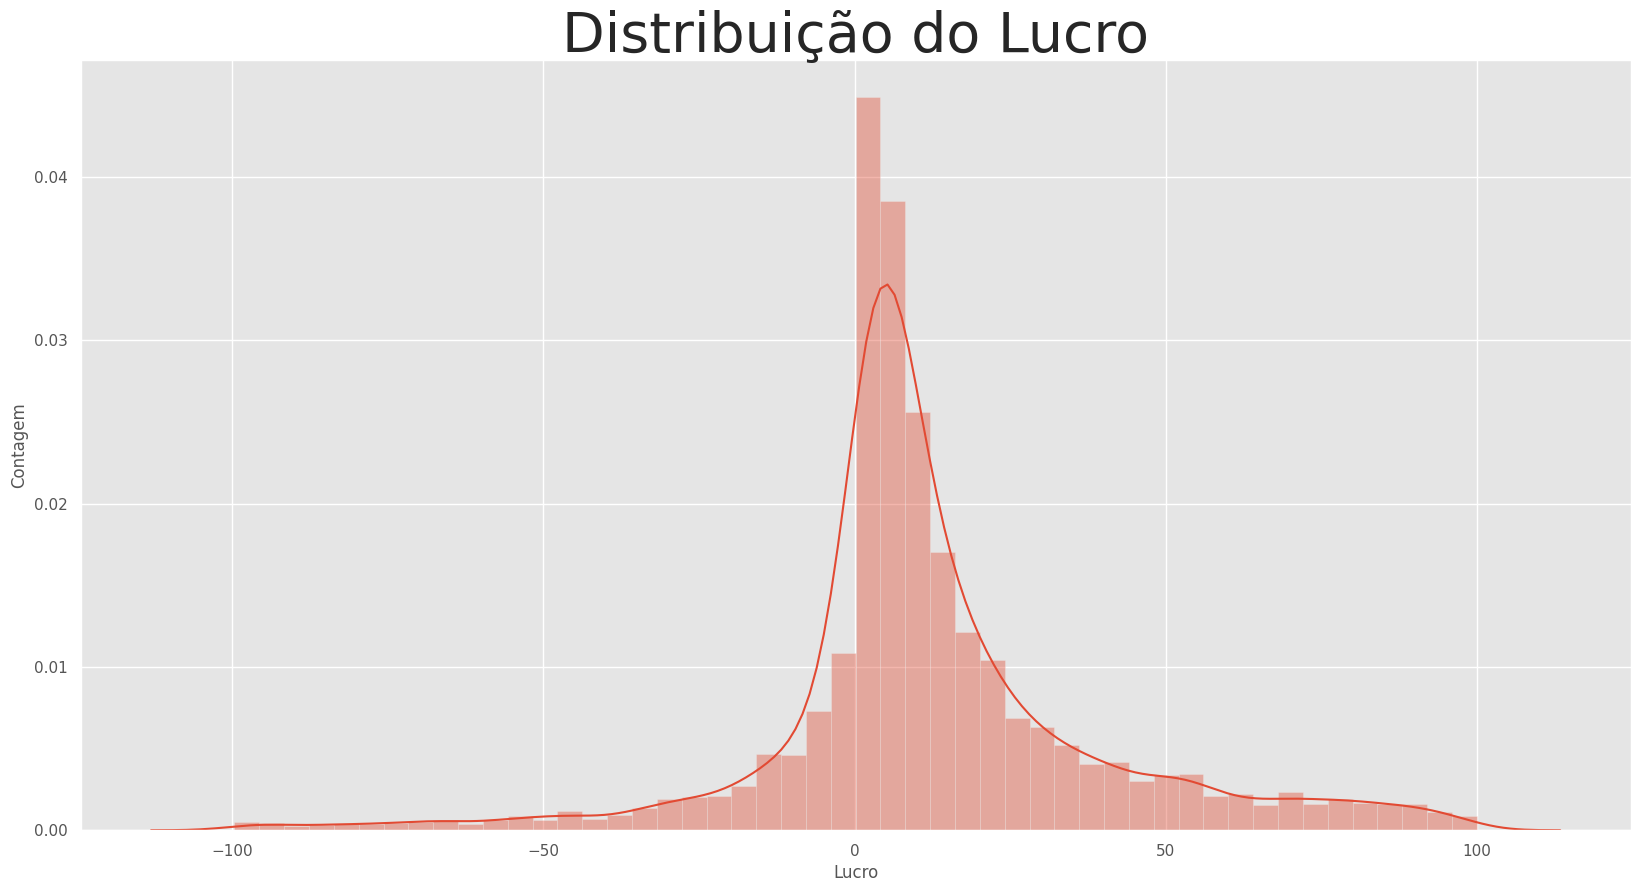

In [63]:
plt.style.use("ggplot")
fig, ax=plt.subplots(figsize=(20, 10))
ax.set_title("Distribuição do Lucro",fontsize=40)
sns.distplot(df[(df['Profit']>-100) & (df['Profit']<100)]['Profit'], ax=ax)
plt.xlabel("Lucro")
plt.ylabel("Contagem")
plt.show()

Claramente os dados seguem uma distribuição normal, como já suspeitava-mos, sendo que a maior parte do faturamento está no intervalo entre \$ 0 e \$ 25.

Obs: Limitamos o faturamento entre o intervalo de -\$100 até \$100 para possibilitar a visualização

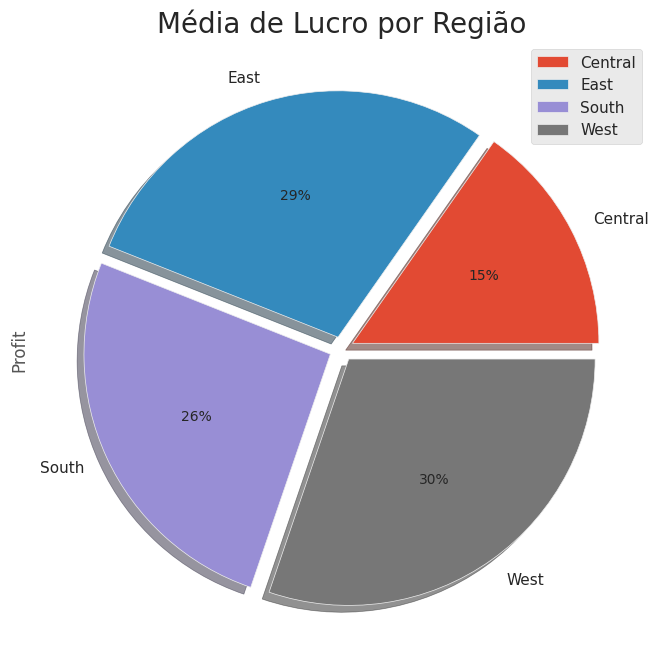

In [64]:
explode = (0.05, 0.05, 0.05, 0.05)
plt.style.use("ggplot")
plt.figure(figsize = (8, 8))
df.groupby(['Region'])['Profit'].mean().plot(kind='pie',y='Profit', explode=explode, autopct='%1.0f%%',shadow=True)
plt.title("Média de Lucro por Região",fontsize=20)
plt.legend()
plt.show()

## Média de Faturamento(Vendas) ao Longo do Tempo

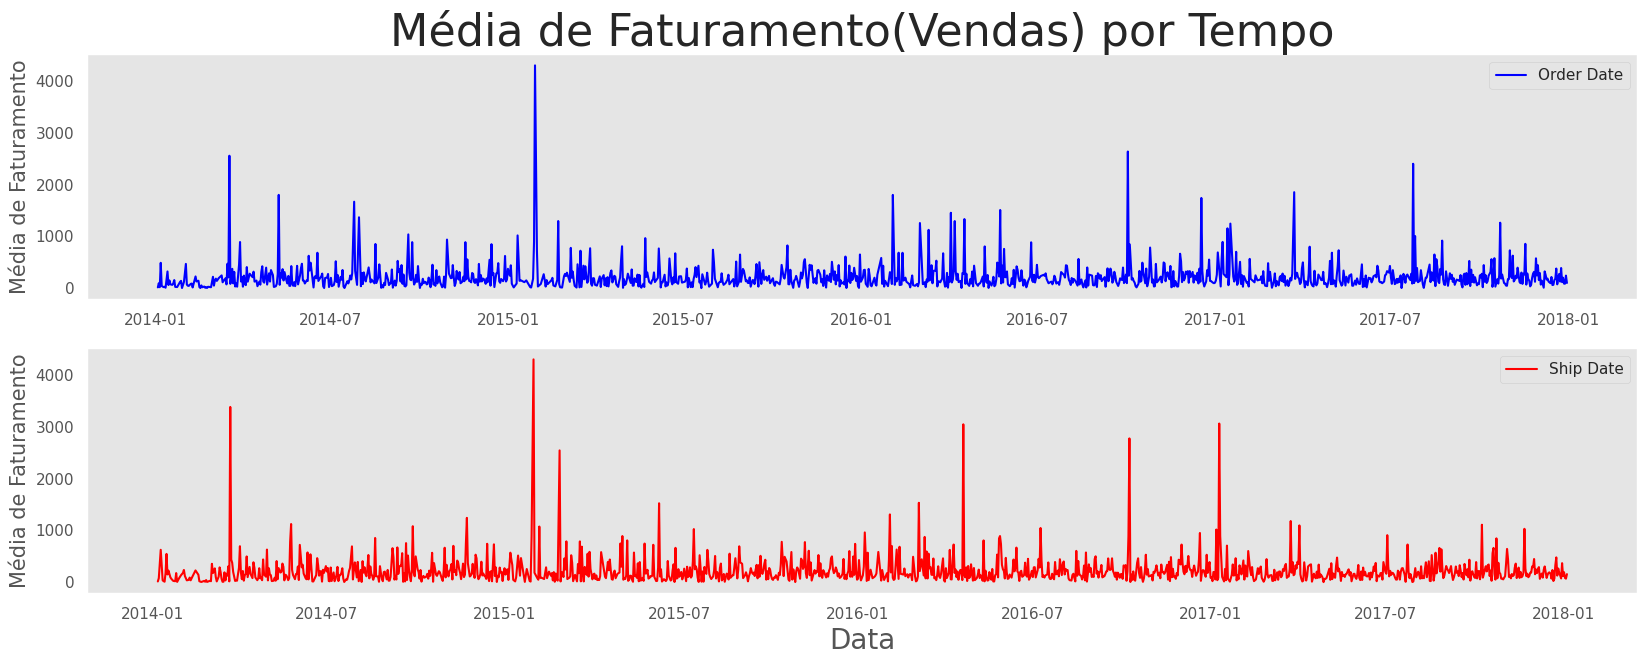

In [65]:
fig, ax = plt.subplots(2, 1, figsize = (20, 7))
g1=df.groupby(['Order Date'])['Sales'].mean()
g2=df.groupby(['Ship Date'])['Sales'].mean()

ax[0].set_title(f"Média de Faturamento(Vendas) por Tempo", fontsize=32)
ax[0].plot(g1.index,g1.values,color='blue',label='Order Date')
ax[0].legend()
ax[0].set_ylabel('Média de Faturamento', fontsize=15)
ax[0].grid()
ax[1].plot(g2.index,g2.values,color='red',label='Ship Date')
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel('Data', fontsize=20)
ax[1].set_ylabel('Média de Faturamento', fontsize=15)

plt.show()

Nota-se que tanto para *Order Date* como para *Ship Date* temos um pico no começo de 2015.

## Média de Lucro por Tempo

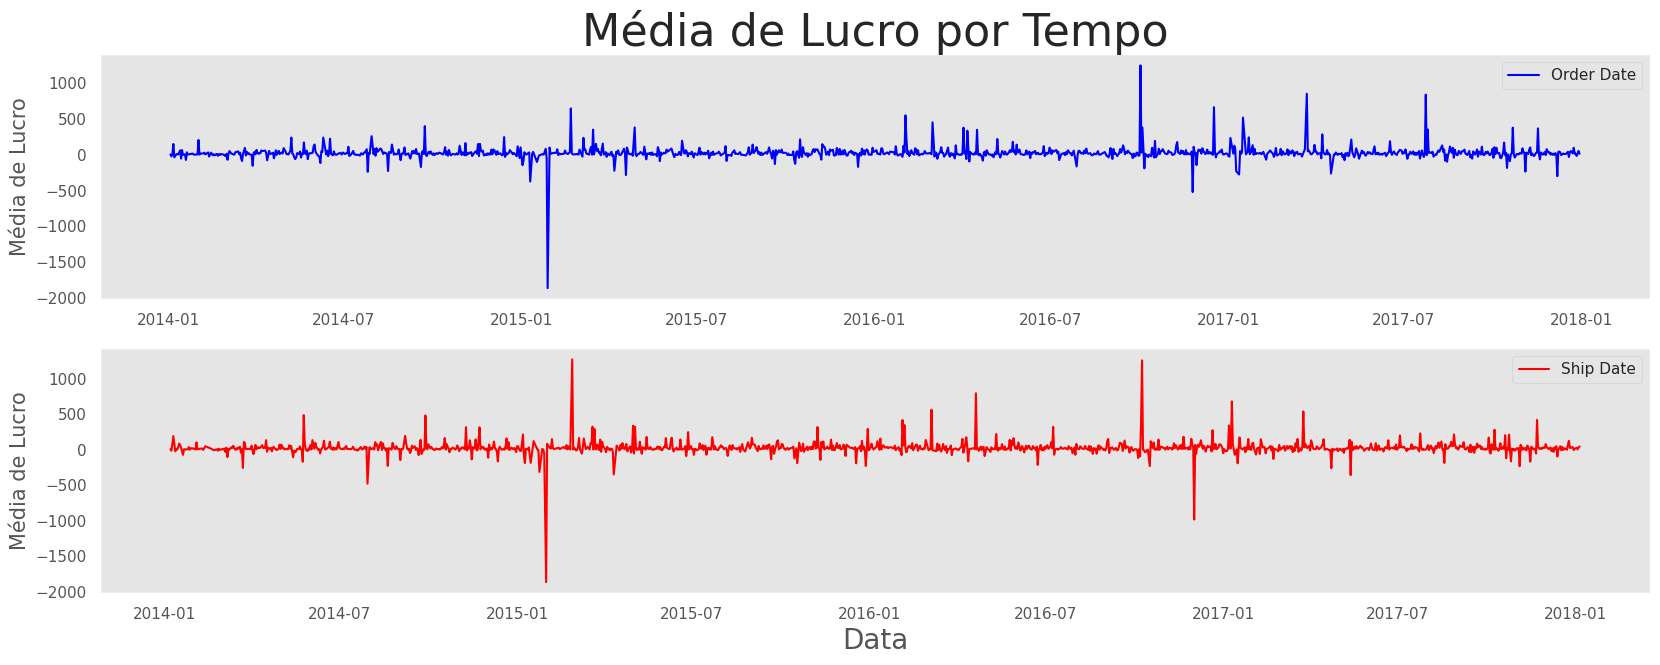

In [66]:
fig, ax = plt.subplots(2, 1, figsize = (20, 7))
g1=df.groupby(['Order Date'])['Profit'].mean()
g2=df.groupby(['Ship Date'])['Profit'].mean()

ax[0].set_title(f"Média de Lucro por Tempo", fontsize=32)
ax[0].plot(g1.index,g1.values,color='blue',label='Order Date')
ax[0].legend()
ax[0].set_ylabel('Média de Lucro', fontsize=15)
ax[0].grid()
ax[1].plot(g2.index,g2.values,color='red',label='Ship Date')
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel('Data', fontsize=20)
ax[1].set_ylabel('Média de Lucro', fontsize=15)

plt.show()

Nota-se que tanto para *Order Date* como para *Ship Date* temos um pico negativo no começo de 2015, qual seria o motivo dessa queda abrupta na média de lucro? aparenta ter uma correlação com o gráfico anterior, pois curiosamente, isso ocorreu quando houve um pico de faturamento no mesmo periodo de tempo, suspeito que exista uma relação com a variável *Discount*, vamos investigar a quantidade de unidades vendidas.

## Quantidade Média de Unidades Vendidas por Tempo

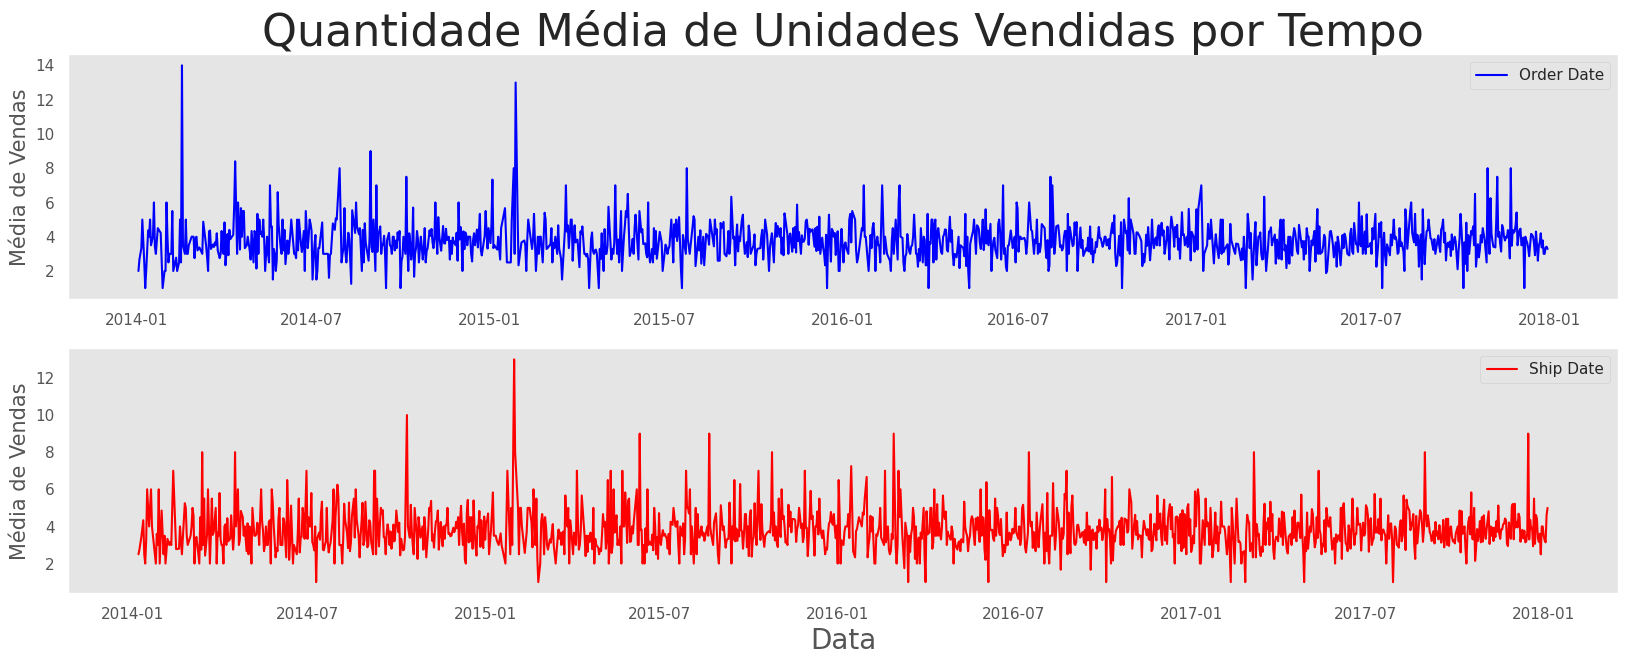

In [67]:
fig, ax = plt.subplots(2, 1, figsize = (20, 7))
g1=df.groupby(['Order Date'])['Quantity'].mean()
g2=df.groupby(['Ship Date'])['Quantity'].mean()

ax[0].set_title(f"Quantidade Média de Unidades Vendidas por Tempo", fontsize=32)
ax[0].plot(g1.index,g1.values,color='blue',label='Order Date')
ax[0].legend()
ax[0].set_ylabel('Média de Vendas', fontsize=15)
ax[0].grid()
ax[1].plot(g2.index,g2.values,color='red',label='Ship Date')
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel('Data', fontsize=20)
ax[1].set_ylabel('Média de Vendas', fontsize=15)

plt.show()

Como suspeitava-mos houve um aumento expressivo na quantidade de produtos vendidos no inicio do ano de 2015, provavelmente esse foi o motivo do faturamento ter aumentado tanto no mesmo período, mas o que está causando essa queda tão brusca na média de lucro no inicio do ano de 2015? será que foram os descontos? vamos conferir:

## Desconto Médio por Tempo

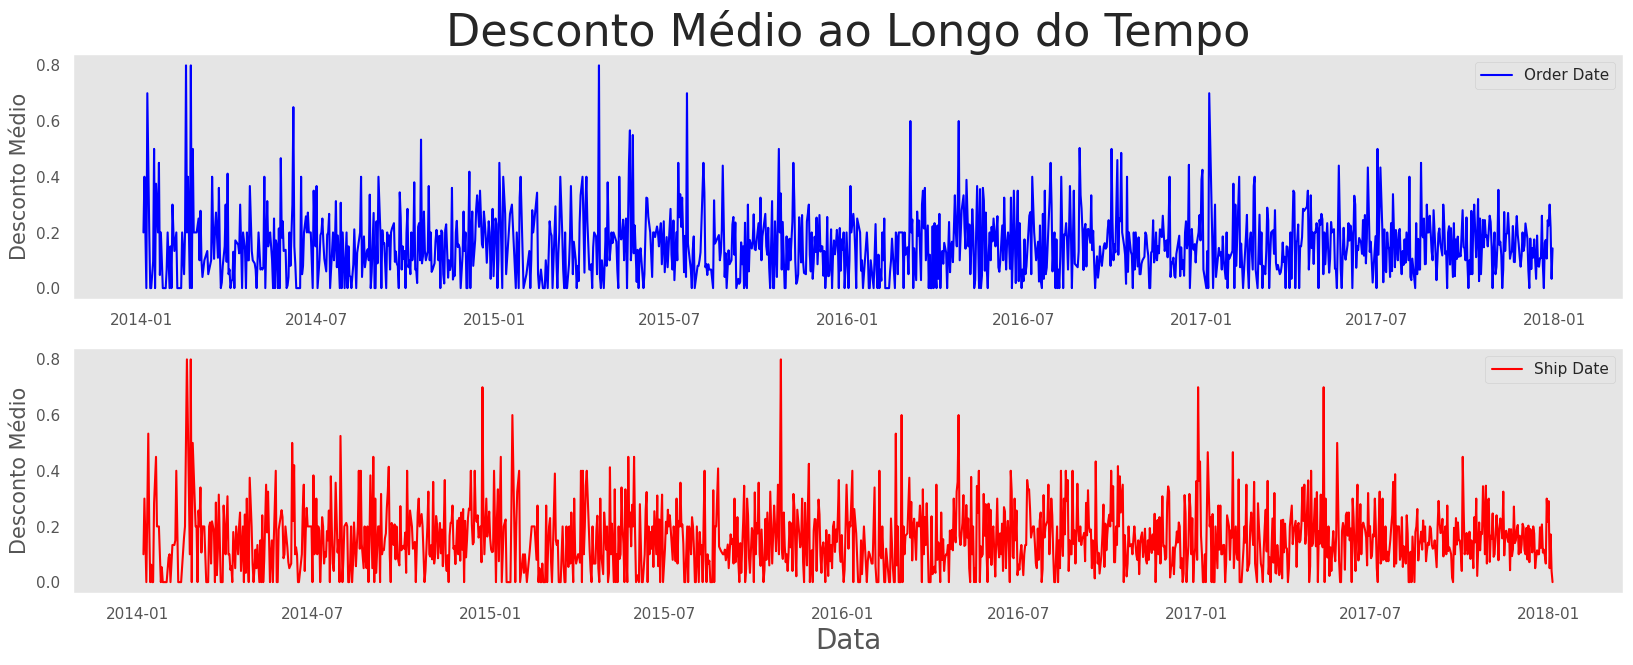

In [68]:
fig, ax = plt.subplots(2, 1, figsize = (20, 7))
g1=df.groupby(['Order Date'])['Discount'].mean()
g2=df.groupby(['Ship Date'])['Discount'].mean()

ax[0].set_title(f"Desconto Médio ao Longo do Tempo", fontsize=32)
ax[0].plot(g1.index,g1.values,color='blue',label='Order Date')
ax[0].legend()
ax[0].set_ylabel('Desconto Médio', fontsize=15)
ax[0].grid()
ax[1].plot(g2.index,g2.values,color='red',label='Ship Date')
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel('Data', fontsize=20)
ax[1].set_ylabel('Desconto Médio', fontsize=15)

plt.show()

### Investigando as Possíveis Causas do Problema:

Analisando cuidadosamente para a data do pedido, nota-se que no inicio do ano de 2015, houve um aumento expressivo(pico) no desconto médio, que embora não fosse o maior valor ao longo de todo período, possa ter influenciado o lucro. A idéia é que um grande desconto gera posteriormente uma grande quantidade de vendas, que consequentemente aumenta o faturamento, como não temos informações sobre todos os custos envolvidos, não podemos afirmar com certeza, pois talvez existam outros fatores desconhecidos, mas a idéia é que a margem de lucro seria muito reduzida, podendo até mesmo ser negativa em alguns casos, devido ao grande aumento dos descontos consequentemente causando o enorme prejuízo no inicio do ano de 2015, pois no final do ano de 2014 e no inicio de 2015, os percentuais de desconto médio foram respectivamente 70% e 60% conforme vemos abaixo:

In [69]:
g2=df.groupby(['Ship Date'])['Discount'].mean()
print(f"Desconto Médio no Final de 2014: {100*g2[g2.index=='2014-12-24'].values[0]} % e inicio de 2015: {100*g2[g2.index=='2015-01-24'].values[0]} %")

Desconto Médio no Final de 2014: 70.0 % e inicio de 2015: 60.0 %


Logo uma boa sugestão seria não se aproximar desse percentual de desconto de 60 %, pois existe o risco de prejuízo, agora vamos investigar por segmento:

In [70]:
g1=df.groupby(['Order Date','Segment'])['Discount'].mean()
g1[(g1.index.get_level_values(0)=='2014-12-14')&(g1.index.get_level_values(1)=='Corporate')]

Order Date  Segment  
2014-12-14  Corporate    0.8
Name: Discount, dtype: float64

Como já imaginávamos, no final do ano de 2014, o segmento coorporativo teve 80% de desconto, o que obviamente é um valor muito alto!

## Quantidade Total de Unidades Vendidas Por Modalidade de Envio

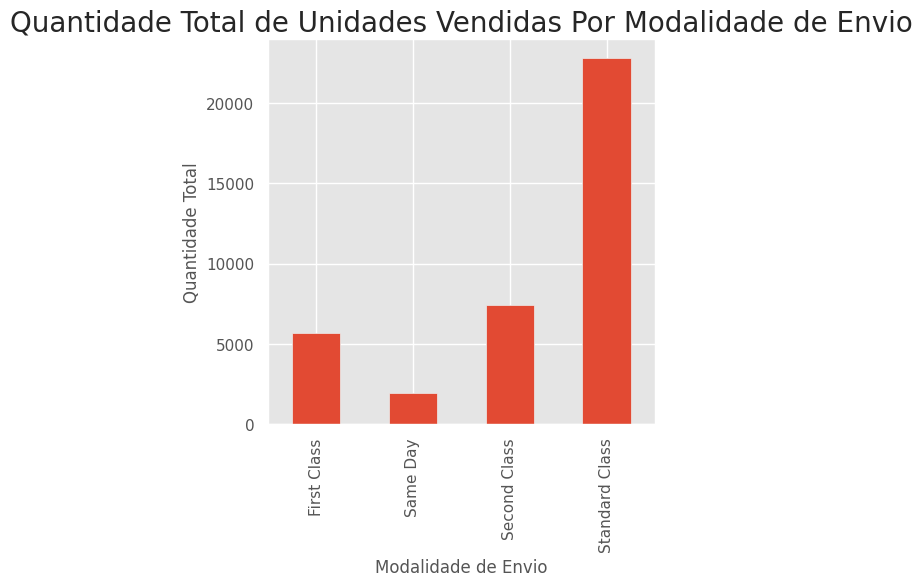

In [71]:
plt.style.use("ggplot")
plt.figure(figsize = (5, 5))
df.groupby(['Ship Mode'])['Quantity'].sum().plot(kind='bar')
plt.title("Quantidade Total de Unidades Vendidas Por Modalidade de Envio",fontsize=20)
plt.xlabel("Modalidade de Envio")
plt.ylabel("Quantidade Total")
plt.show()

A modalidade de envio com a maior quantidade total de unidades vendidas foi a classe padrão, com mais de 20000 unidades vendidas, e a menor foi o mesmo dia.

In [72]:
print('Quantidade total de clientes únicos=',len(df['Customer Name'].unique()))

Quantidade total de clientes únicos= 793


## Faturamento Total Máximo e Mínimo por Cliente

In [73]:
df.groupby(['Customer Name'])['Sales'].sum().sort_values(ascending=False)

Customer Name
Sean Miller        25043.050
Tamara Chand       19052.218
Raymond Buch       15117.339
Tom Ashbrook       14595.620
Adrian Barton      14473.571
                     ...    
Roy Skaria            22.328
Mitch Gastineau       16.739
Carl Jackson          16.520
Lela Donovan           5.304
Thais Sissman          4.833
Name: Sales, Length: 793, dtype: float64

O maior faturamento total máximo veio do cliente Sean Miller com \$ 25043.050, e o menor foi Thais Sissman: \$ 4.833.

## Lucro Total Máximo e Mínimo por Cliente

In [74]:
df.groupby(['Customer Name'])['Profit'].sum().sort_values(ascending=False)

Customer Name
Tamara Chand      8981.3239
Raymond Buch      6976.0959
Sanjit Chand      5757.4119
Hunter Lopez      5622.4292
Adrian Barton     5444.8055
                    ...    
Henry Goldwyn    -2797.9635
Sharelle Roach   -3333.9144
Luke Foster      -3583.9770
Grant Thornton   -4108.6589
Cindy Stewart    -6626.3895
Name: Profit, Length: 793, dtype: float64

O maior lucro total máximo é: \$ 8981.3239, e veio do cliente Tamara Chand, e o menor foi Cindy Stewart: \$ -6626.3895.

## Desconto Total Máximo e Mínimo por Cliente

In [75]:
df.groupby(['Customer Name'])['Discount'].sum().sort_values(ascending=False)

Customer Name
Zuschuss Carroll       7.9
William Brown          7.6
Chloris Kastensmidt    7.5
Erin Ashbrook          7.5
Lena Cacioppo          7.2
                      ... 
Bart Folk              0.0
Tim Taslimi            0.0
Ricardo Sperren        0.0
Bobby Odegard          0.0
Brendan Dodson         0.0
Name: Discount, Length: 793, dtype: float64

O cliente que mais recebeu descontos foi Zuschuss Carroll com 7.9, e o menor foi Brendan Dodson: 0.0.

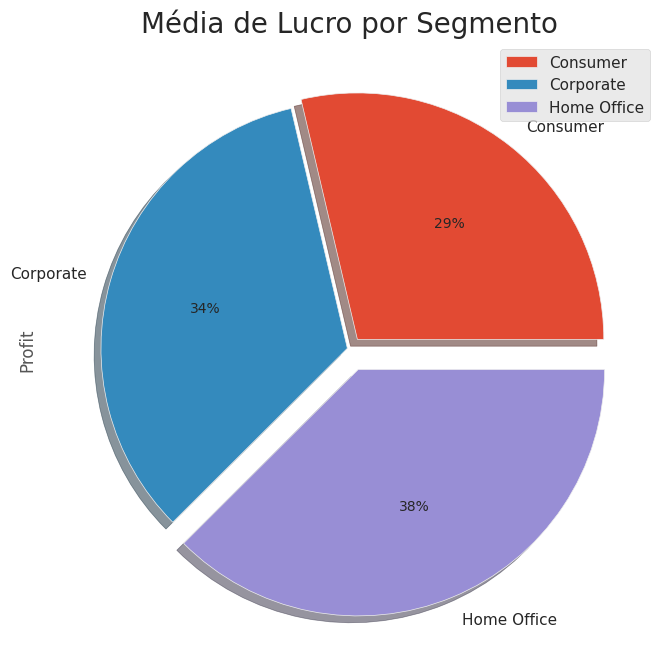

In [76]:
explode = (0.05,0.01,0.09)
plt.style.use("ggplot")
plt.figure(figsize = (8, 8))
df.groupby(['Segment'])['Profit'].mean().plot(kind='pie',y='Profit', explode=explode, autopct='%1.0f%%',shadow=True)
plt.title("Média de Lucro por Segmento",fontsize=20)
plt.legend()
plt.show()

O segmento com maior média de lucro foi Home office com 38%, e o menor foi consumer com 29%

## Violin-plot de Quantidade Por Categoria Separados Por Região

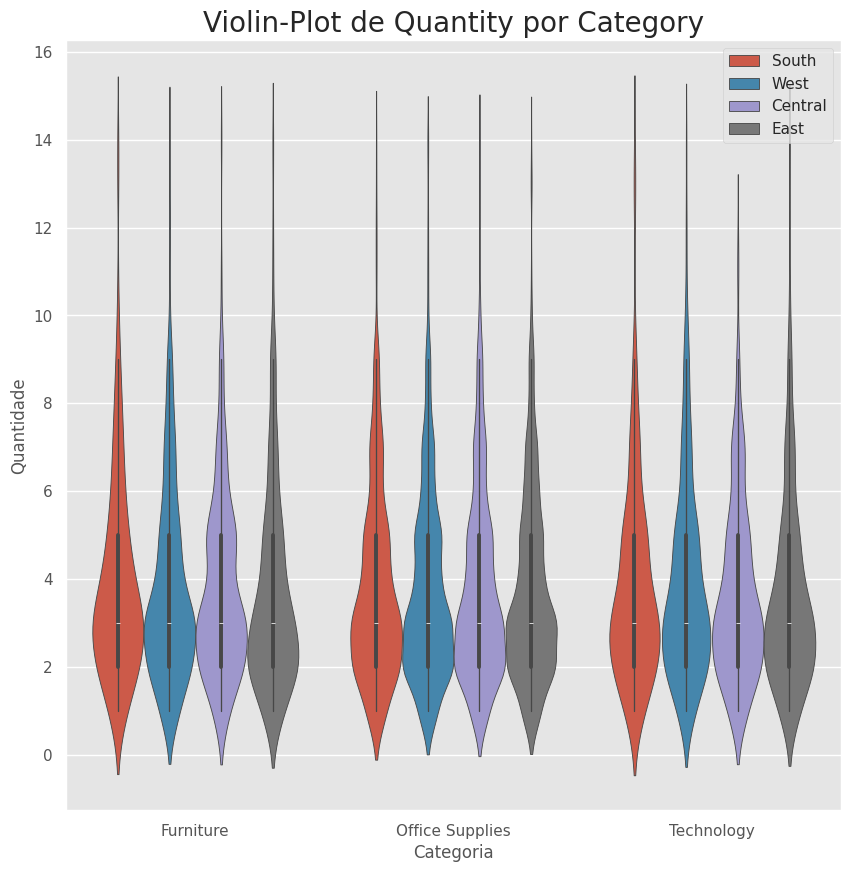

In [77]:
plt.figure(figsize=(10,10))
plt.title('Violin-Plot de Quantity por Category',fontsize=20)
sns.violinplot(data=df, x="Category", y="Quantity", hue="Region")
plt.xlabel("Categoria")
plt.ylabel("Quantidade")
plt.legend()
plt.show()

No violin-plot acima, podemos ver a distribuição da variável quantidade separados por categoria e região

## Faturamento Total Por Categoria

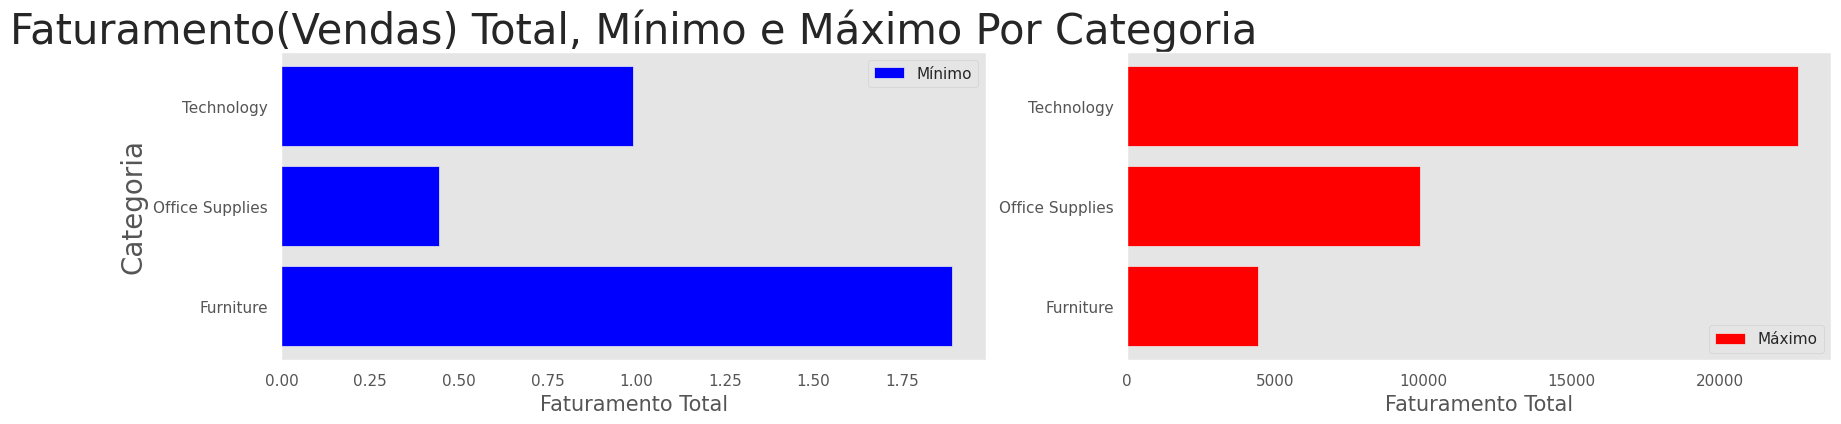

In [78]:
fig, ax = plt.subplots(1, 2, figsize = (20, 4))
g1=df.groupby(['Category'])['Sales'].min()
g2=df.groupby(['Category'])['Sales'].max()

ax[0].set_title(f"Faturamento(Vendas) Total, Mínimo e Máximo Por Categoria", fontsize=30)
ax[0].barh(g1.index,g1.values,color='blue',label='Mínimo')
ax[0].legend()
ax[0].set_ylabel('Categoria', fontsize=20)
ax[0].grid()
ax[0].set_xlabel("Faturamento Total", fontsize=15)

ax[1].barh(g2.index,g2.values,color='red',label='Máximo')
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel("Faturamento Total", fontsize=15)


plt.show()

Tecnologia foi a categoria com o maior faturamento total, ultrapassando \$ 20000, e o menor foi material de escritório

#  Lucro Médio Por Sub-Categoria

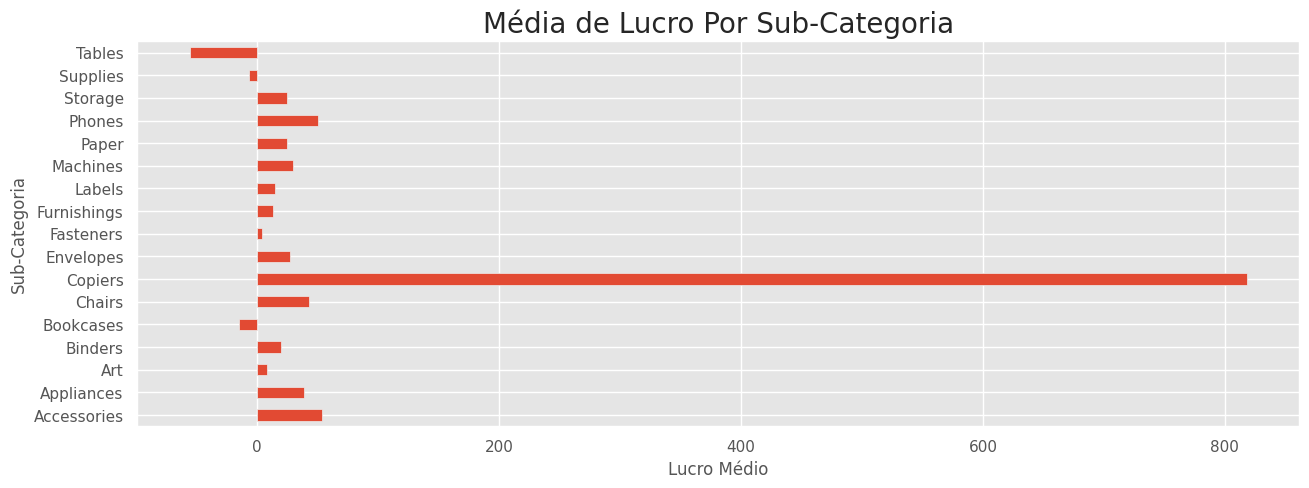

In [79]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 5))
df.groupby(['Sub-Category'])['Profit'].mean().plot(kind='barh')
plt.title("Média de Lucro Por Sub-Categoria",fontsize=20)
plt.xlabel("Lucro Médio")
plt.ylabel("Sub-Categoria")
plt.show()

A sub-categoria de produtos com o maior lucro médio foi de longe copiers, ultrapassando \$ 800, e a menor foi tables com valor negativo.

In [80]:
print("Quantidade de produtos únicos:",len(df['Product Name'].unique()))

Quantidade de produtos únicos: 1850


## Lucro Total por Produtos

In [81]:
df.groupby(['Product Name'])['Profit'].sum().sort_values(ascending=False)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
                                                                                  ...    
Bush Advantage Collection Racetrack Conference Table                           -1934.3976
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                       -2876.1156
Cubify CubeX 3D Printer Triple Head Print                                      -3839.9904
Lexmark MX611dhe Monochrome Laser Printer                                      -4589.9730
Cubify CubeX 3D Printer Double Head Print                                      -8879.97

## Lucro Médio por Produtos

In [82]:
df.groupby(['Product Name'])['Profit'].mean().sort_values(ascending=False)

Product Name
Canon imageCLASS 2200 Advanced Copier                                    5039.985600
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier    1995.990000
Ativa V4110MDD Micro-Cut Shredder                                        1886.473050
3D Systems Cube Printer, 2nd Generation, Magenta                         1858.985700
Zebra ZM400 Thermal Label Printer                                        1671.768000
                                                                            ...     
Zebra GK420t Direct Thermal/Thermal Transfer Printer                     -938.280000
Lexmark MX611dhe Monochrome Laser Printer                               -1147.493250
Cisco TelePresence System EX90 Videoconferencing Unit                   -1811.078400
Cubify CubeX 3D Printer Double Head Print                               -2959.990133
Cubify CubeX 3D Printer Triple Head Print                               -3839.990400
Name: Profit, Length: 1850, dtype: float64

Nota-se que o produto 'Canon imageCLASS 2200 Advanced Copier' possui o maior lucro total e médio, em último lugar temos: Cubify CubeX 3D Printer Triple Head Print.

## Lista dos Produtos Mais Vendidos

In [83]:
df.groupby(['Product Name'])['Quantity'].sum().sort_values(ascending=False)

Product Name
Staples                                                                      215
Staple envelope                                                              170
Easy-staple paper                                                            150
Staples in misc. colors                                                       86
KI Adjustable-Height Table                                                    74
                                                                            ... 
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs                   1
Xerox 20                                                                       1
Penpower WorldCard Pro Card Scanner                                            1
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order      1
Boston 1900 Electric Pencil Sharpener                                          1
Name: Quantity, Length: 1850, dtype: int64

## Produtos Com Maior Desconto

In [84]:
df.groupby(['Product Name'])['Discount'].sum().sort_values(ascending=False)

Product Name
Storex Dura Pro Binders                                                                                                            7.2
Avery Non-Stick Binders                                                                                                            6.8
GBC Instant Report Kit                                                                                                             6.4
Avery Self-Adhesive Photo Pockets for Polaroid Photos                                                                              5.9
GBC Standard Recycled Report Covers, Clear Plastic Sheets                                                                          5.9
                                                                                                                                  ... 
Ativa V4110MDD Micro-Cut Shredder                                                                                                  0.0
Honeywell Enviracaire Portable HEPA Air Cl

## Produtos Com Maior Faturamento

In [85]:
df.groupby(['Product Name'])['Sales'].sum().sort_values(ascending=False)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
                                                                                 ...    
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                                 7.700
Grip Seal Envelopes                                                                7.072
Xerox 20                                                                           6.480
Avery 5                                                                            5.760
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac                   1.624
Name: Sa

## Faturamento Total Agrupado Por Categoria e Sub-Categoria

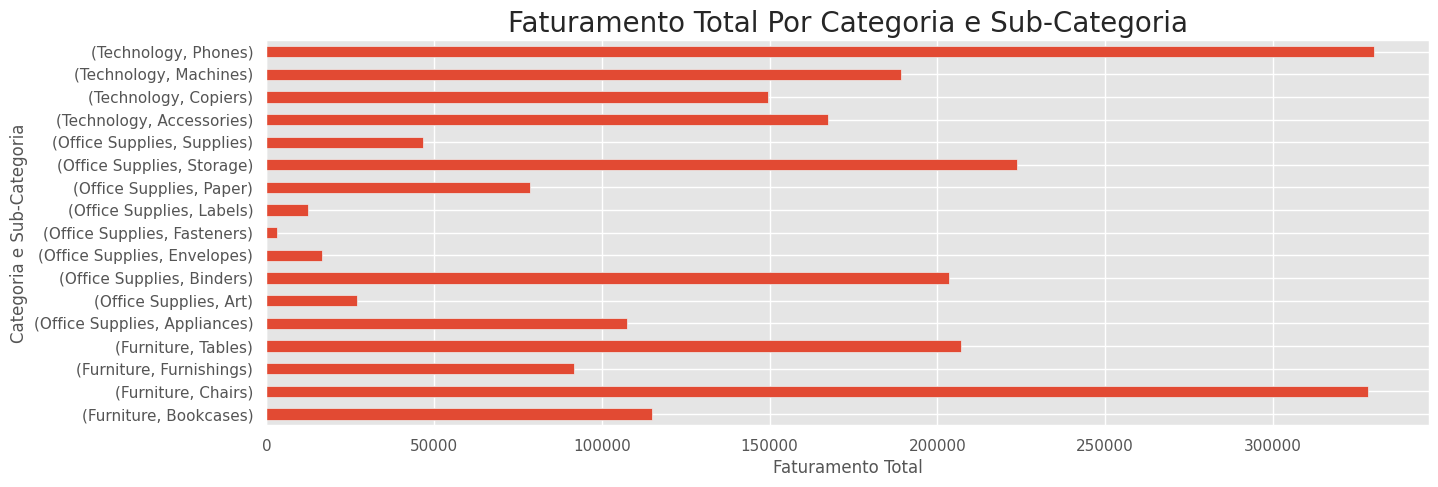

In [86]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 5))
df.groupby(['Category', 'Sub-Category'])['Sales'].sum().plot(kind='barh')
plt.title("Faturamento Total Por Categoria e Sub-Categoria",fontsize=20)
plt.xlabel("Faturamento Total")
plt.ylabel("Categoria e Sub-Categoria")
plt.show()

Os celulares lideram o ranking de produtos mais vendidos

## Visualizando as Distribuições das Variáveis Numéricas


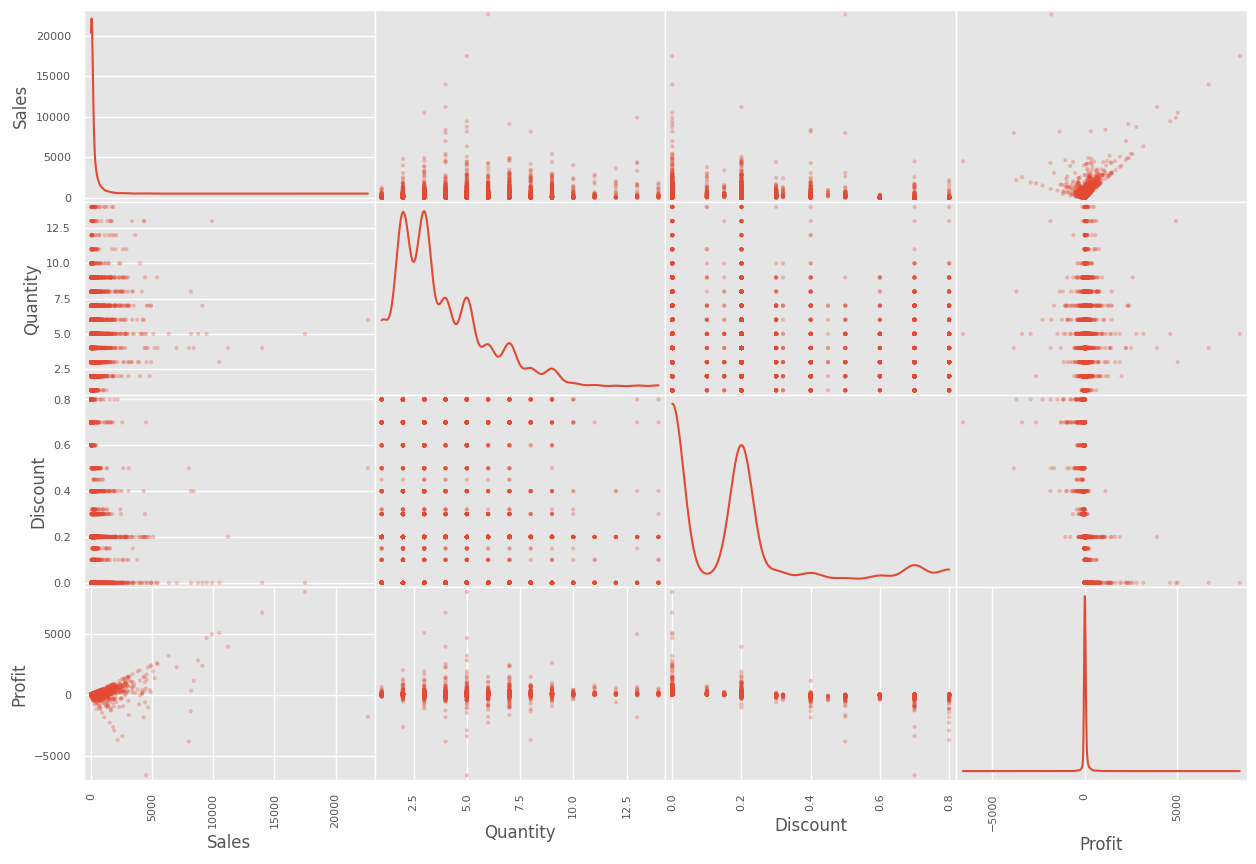

In [87]:
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
pd.plotting.scatter_matrix(df[num_cols], alpha = 0.3, figsize = (15,10), diagonal = 'kde');

## A Matriz de Dispersão Mostra o Coeficiente de Correlação de Person Entre os Recursos

<Axes: >

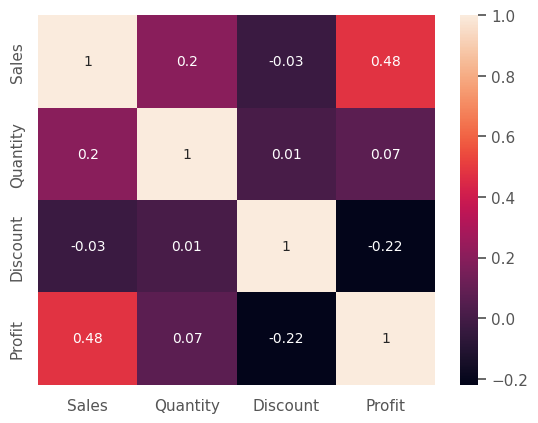

In [88]:
sns.heatmap(df[num_cols].corr().round(2),annot=True)

Como já era de se esperar, existe uma correlação positiva significativa entre as variáveis sales(faturamento) e profit(lucro), pois analisando as distribuições das variáveis vemos a tendência de crescimento e confirmamos na matriz de dispersão logo acima, vemos um coeficiente de 0.48, muito próximo de person 0.5 um valor relevante.

## Análise de Anomalias

### Podemos identificar os outlers, de acordo com a seguinte fórmula:

**IRQ=1.5*(Q3-Q1)**

**limite inferior=Q1-IRQ**

**limite superior=Q3+IRQ**

Para uma determinada variável numérica, caso ela esteja fora do intervalo, ou seja, menor que o limite inferior ou maior que o limite superior, ela será considerada uma anomalia, vamos investigar através dos box-plot.

## Box-plot de Profit

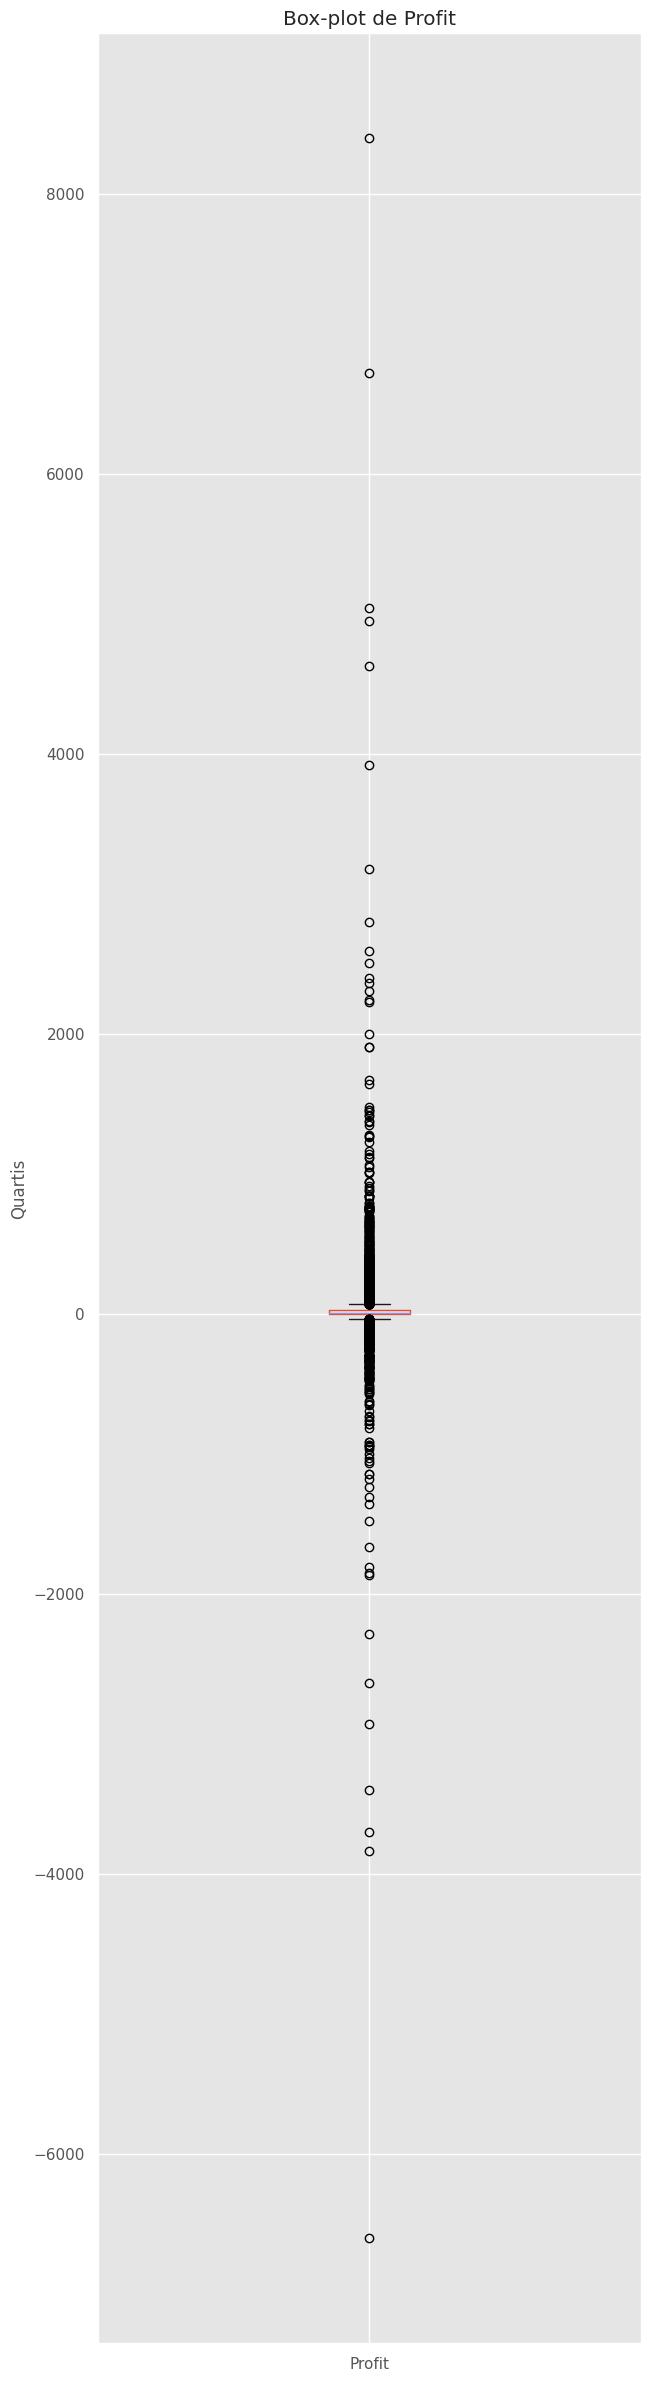

In [89]:
plt.figure(figsize=(7,30))
plt.title('Box-plot de Profit')
df.boxplot(column=['Profit'])
plt.ylabel("Quartis")
plt.show()

## Box-plot de Sales

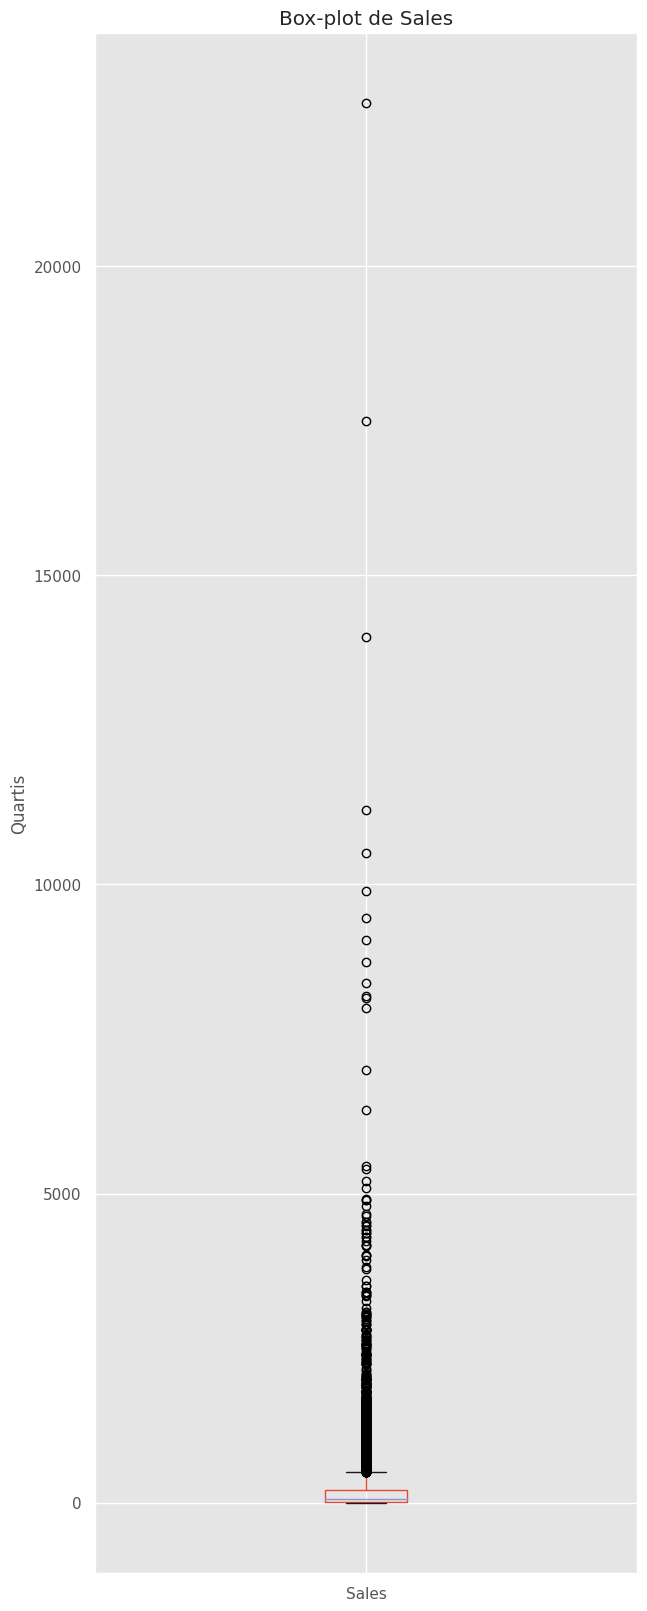

In [90]:
plt.figure(figsize=(7,20))
plt.title('Box-plot de Sales')
df.boxplot(column=['Sales'])
plt.ylabel("Quartis")
plt.show()

## Box-plot de Discount

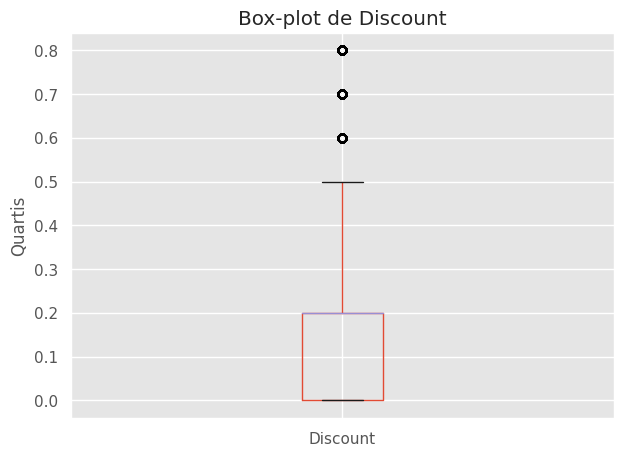

In [91]:
plt.figure(figsize=(7,5))
plt.title('Box-plot de Discount')
df.boxplot(column=['Discount'])
plt.ylabel("Quartis")
plt.show()

## Box-plot de Quantity

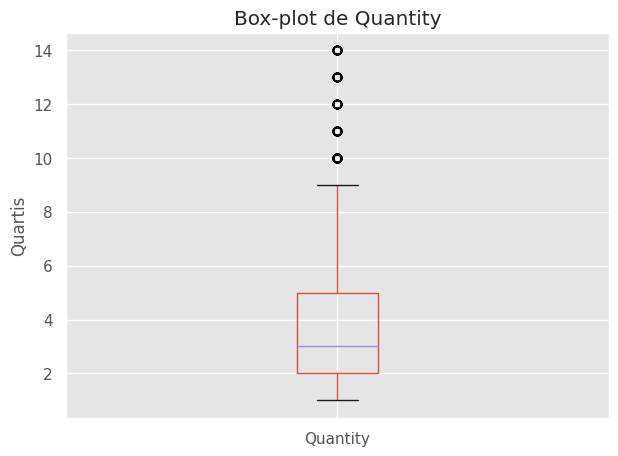

In [92]:
plt.figure(figsize=(7,5))
plt.title('Box-plot de Quantity')
df.boxplot(column=['Quantity'])
plt.ylabel("Quartis")
plt.show()

Analisando os box-plot para as variáveis numéricas:'Sales', 'Quantity', 'Discount' e 'Profit', nota-se que a maioria das distribuições são bastante assimétricas, e que todas possuem outliers, mas o que mais chama a atenção são as variáveis 'Profit' e 'Sales' que possuem uma quantidade enorme de outliers, então vamos remove-los:

## Remoção de Outliers

In [93]:
df_copy=df.copy()
outliers=[]
#Para cada recurso, encontrar os pontos de dados com valores extremos altos ou baixos
for feature in num_cols:
    #Calcular Q1 (25º percentil dos dados) para o recurso fornecido
    Q1 = np.percentile(df_copy[feature],25)
    #Calcular Q3 (75º percentil dos dados) para o recurso fornecido
    Q3 = np.percentile(df_copy[feature],75)
    #Use o intervalo interquartil para calcular um passo de discrepância (1,5 vezes o intervalo interquartil)
    step = 1.5*(Q3 - Q1)
    #Exibir os outliers
    print("Pontos de dados considerados outliers para o recurso '{}':".format(feature))
    delete=df_copy[~((df_copy[feature] >= Q1 - step) & (df_copy[feature] <= Q3 + step))]
    print(delete)
    print()
    outliers+=list(delete.index)

good_data = df_copy.drop(df_copy.index[outliers]).reset_index(drop = True)

Pontos de dados considerados outliers para o recurso 'Sales':
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
7          8  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
10        11  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
11        12  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
...      ...             ...        ...        ...             ...   
9931    9932  CA-2015-104948 2015-11-13 2015-11-17  Standard Class   
9942    9943  CA-2014-143371 2014-12-28 2015-01-03  Standard Class   
9947    9948  CA-2017-121559 2017-06-01 2017-06-03    Second Class   
9948    9949  CA-2017-121559 2017-06-01 2017-06-03    Second Class   
9968    9969  CA-2017-153871 2017-12-11 2017-12-17  Standard Class   

     Customer ID    Customer Name    Segment        Country             City  \
1       CG-12520 

Agora que removemos os outliers, vamos verificar como ficaram os quartis dos dados:

## Box-Plot Final das Variáveis Numéricas Sem Outliers

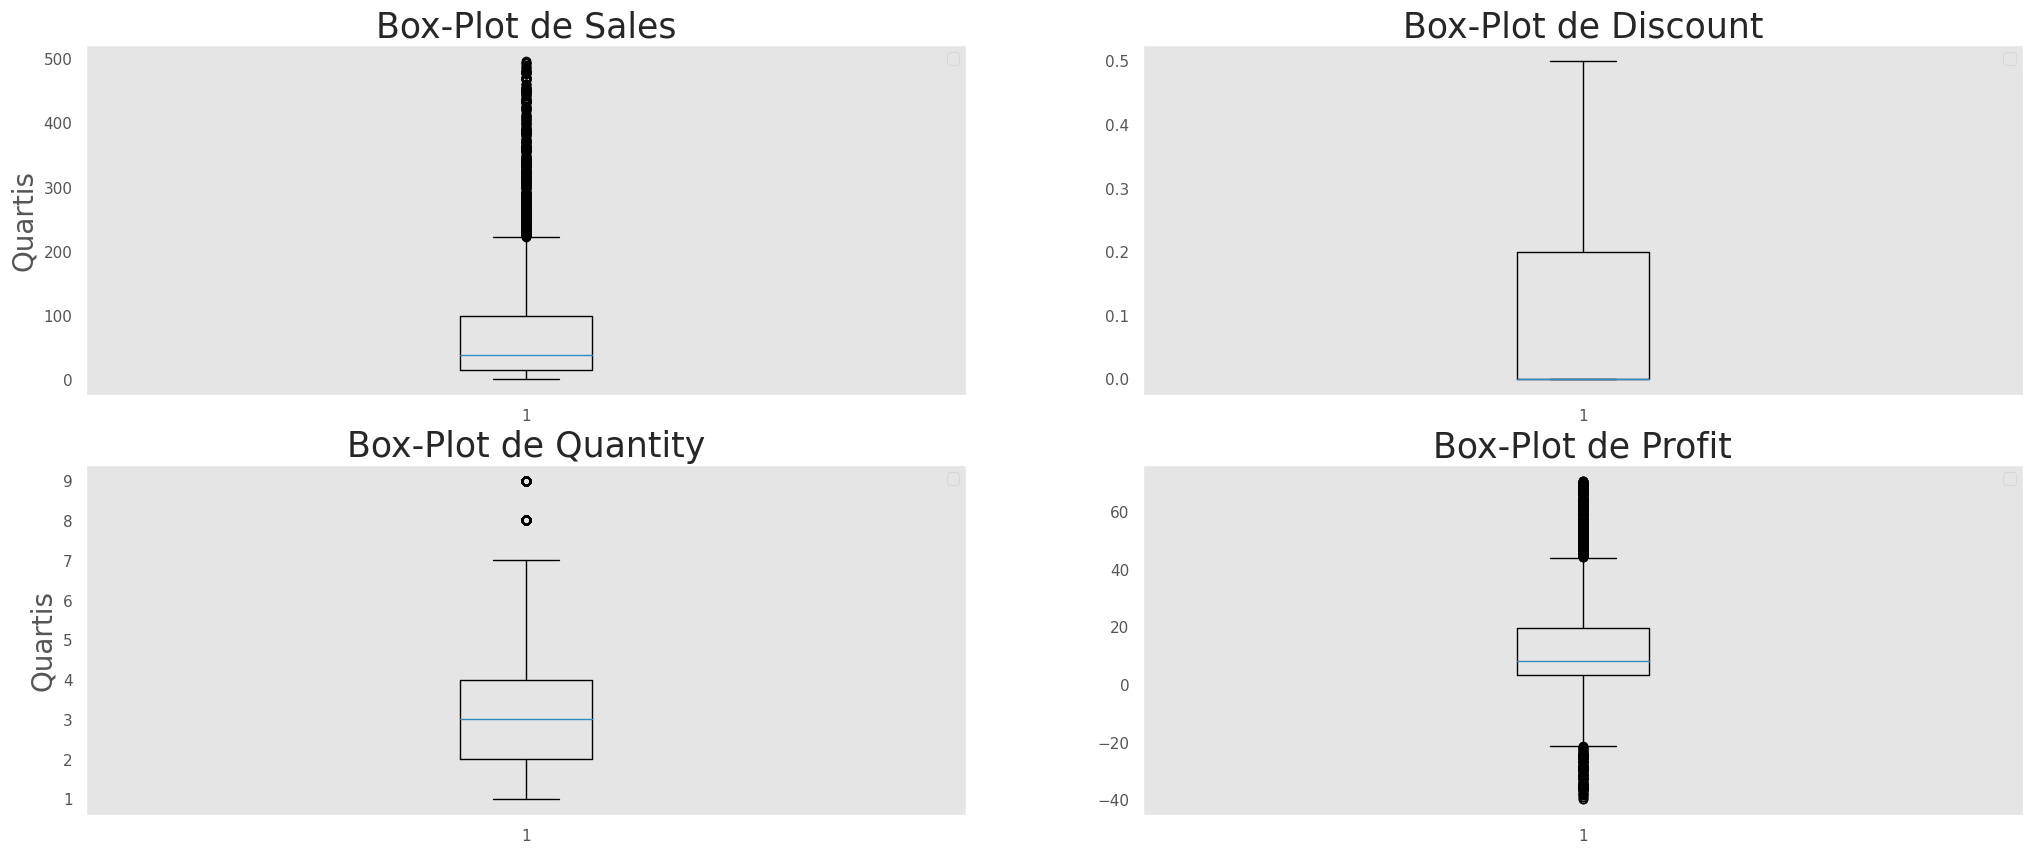

In [94]:
fig, ax = plt.subplots(2, 2, figsize = (25, 10))

ax[0,0].set_title(f"Box-Plot de Sales", fontsize=25)
ax[0,0].boxplot(good_data['Sales'])
ax[0,0].legend()
ax[0,0].set_ylabel("Quartis", fontsize=20)
ax[0,0].grid()
#ax[0,0].set_xlabel("Sales", fontsize=15)

ax[0,1].set_title(f"Box-Plot de Discount", fontsize=25)
ax[0,1].boxplot(good_data['Discount'])
ax[0,1].legend()
ax[0,1].grid()
#ax[0,1].set_xlabel("Discount", fontsize=15)

ax[1,0].set_title(f"Box-Plot de Quantity", fontsize=25)
ax[1,0].boxplot(good_data['Quantity'])
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_ylabel("Quartis", fontsize=20)
#ax[1,0].set_xlabel("Quantity", fontsize=15)

ax[1,1].set_title(f"Box-Plot de Profit", fontsize=25)
ax[1,1].boxplot(good_data['Profit'])
ax[1,1].legend()
ax[1,1].grid()
#ax[1,1].set_xlabel("Profit", fontsize=15)

plt.show()

Nota-se que embora ainda existam algumas anomalias, analisando pelos quartis dos box-plot, vemos que a distribuição dos dados melhorou bastante, tornando-se mais simétrica em relação a como estavam anteriormente.

## Percentual do Novo Dataset

In [95]:
for feature in num_cols:
  print("{} = {} %".format(feature,100*round(len(good_data[feature])/len(df[feature]),4)))

Sales = 71.47 %
Quantity = 71.47 %
Discount = 71.47 %
Profit = 71.47 %


Após remover os outliers, restaram 71.47 % dos dados originais, para as variáveis numéricas

## Teste de Hipótese

Vamos realisar o teste de hipótese da variável profit (lucro), primeiramente iremos verificar a distribuição da variável:

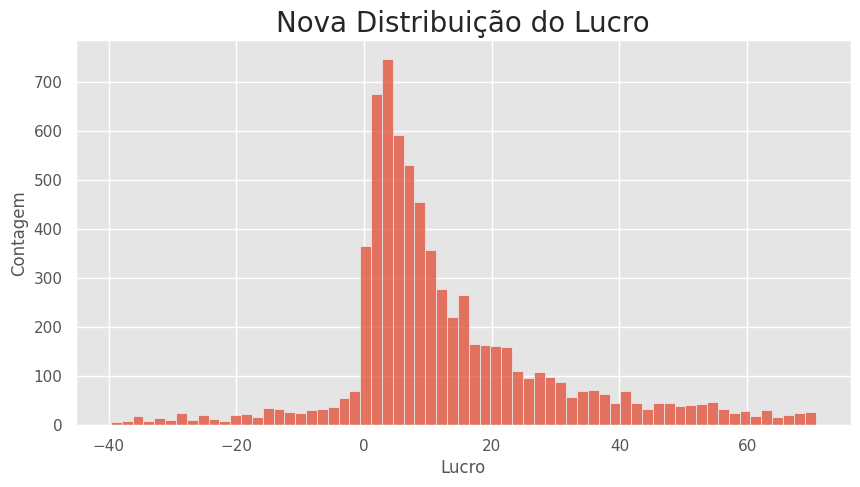

In [96]:
plt.style.use("ggplot")
fig, ax=plt.subplots(figsize=(10, 5))
ax.set_title("Nova Distribuição do Lucro",fontsize=20)
sns.histplot(good_data['Profit'], ax=ax)
plt.xlabel("Lucro")
plt.ylabel("Contagem")
plt.show()

Agora que removemos os outliers, aparentemente os dados amostrais seguem uma distribuição normal conforme mostra o gráfico acima, mas iremos realizar um teste estatístico de normalidade para ter certeza:

In [110]:
α=0.05
k2, p = normaltest(good_data['Profit'])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal

if p < α:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

A Hipótese Nula pode ser rejeitada


Agora que confirmamos que os dados amostrais não seguem uma distribuição normal, iremos realizar um teste não paramétrico, vamos considerar os dados tratados (sem os outliers e com média igual à **x**) sejam uma amostra de uma população representada pelos dados originais, cuja média seja igual à **μ**, iremos definir a hipótese nula e alternativa, comparando as médias **μ** e **x**:

**H0: x>=μ**

**H1: x<μ**

Como os dados da população possui muitos outliers, isso iria acabar afetando a média para ter um valor muito alto, por isso vamos considerar que a hipótese alternativa seja que a média populacional seja maior ou igual que a da amostra, que é o que estamos tentando provar.

Vamos definir o nível de significância **alpha(α)** igual a 0.05:

**α=0.05**


In [97]:
μ=df['Profit'].mean()
x=good_data['Profit'].mean()
print("Média da População:",μ)
print("Média da Amostra:",x)

Média da População: 28.656896307784663
Média da Amostra: 13.001752022959538
Alpha: 0.05


## **Teste Unilateral à Esquerda**

Como a hipótese nula foi definida como **(x>=μ)**, iremos realizar um teste unilateral à esquerda

<!DOCTYPE html>
<html>
  <head>
    <link rel="stylesheet" href="styles.css" />
  </head>
  <body>
      <img src='https://drive.google.com/uc?id=1KVgvFfEcxRwvMUm2ReFsHwl9U5r4VTEz&export=download' width="500">
      <script src="script.js"></script>
  </body>
</html>

Onde a área da curva em preto representa a região crítica, como se trata de um teste não paramétrico, iremos utilizar a distribuição qui-quadrado, e o valor p, que é a probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula será a nossa variável de decisão.


In [124]:
#calculando o p-value para a distribuição qui-quadrado:
dist = stats.chi2(df=2)
p_value=dist.pdf(good_data['Profit'].mean())
p_value


0.0007510613698418375

Agora vamos comparar o valor-p com o nível de significância alpha(α), caso p-value for menor que alpha, rejeita-se a hipótese nula, do contrário ela não é rejeitada:

In [127]:
# Tomada de decisão
if p_value < α:
    print("Rejeitar a hipótese nula: Há evidências de que x<μ")
else:
    print("Não rejeitar a hipótese nula: Não há evidências suficientes para concluir que x<μ.")

Rejeitar a hipótese nula: Há evidências de que x<μ


# PROPOSTA DE MELHORIA:

Acredito que poderia ter explorado mais os dados, descobrindo novos relacionamentos entre eles, gerar mais visualizações, para gerar mais insights, e também ter utilizado métodos estatísticos mais avançados para investigar a grande queda no lucro no início de 2015.